# PCA

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


In [14]:
digits = load_digits()
data, labels = digits.data, digits.target

x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.3)
#### pre-process the data
x_train -= np.mean(x_train)
x_train /= np.std(x_train)
x_test -= np.mean(x_test)
x_test /= np.std(x_test)

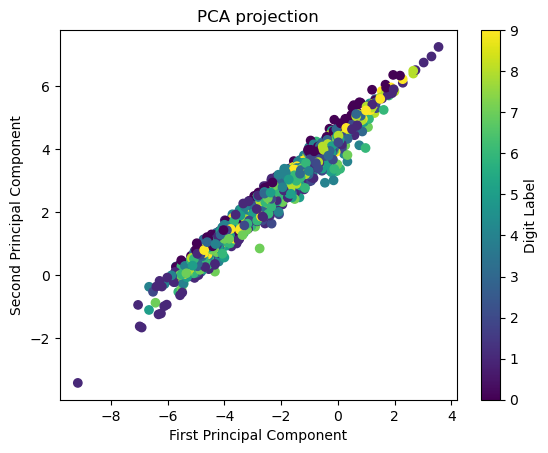

In [31]:
#covariance matrix
S = np.cov(x_train.T)  
#obtain eigenvalues adn eigenvectors
eig_values, eig_vectors = np.linalg.eig(S) 
#sorting
sorted_eig_values = -np.sort(-eig_values)
sorted_eig_vectors = -np.sort(-eig_vectors)
#he 2 largest eigenvalues and their corresponding eigenvectors
PC = sorted_eig_vectors[:, :2] 
dataproj = x_train.dot(PC)

# Plot the projected data
plt.scatter(dataproj[:, 0], dataproj[:, 1], c=y_train)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA projection')
plt.colorbar(label='Digit Label')
plt.show()

# K-Means clustering

In [50]:
from sklearn.datasets import make_blobs

In [51]:
X, y = make_blobs(centers=4, n_samples=1000)
np.random.seed(0)
#choosing 4 centers
initial_centers = X[np.random.choice(X.shape[0], 4, replace=False)]
centers = np.copy(initial_centers)
iterations = 0
while True:
    assignments = []
    for i, x in enumerate(X):
        distances = np.linalg.norm(x - centers, axis=1)
        assignments.append(np.argmin(distances))

    new_centers = []
    for i in range(4):
        indices = np.where(np.array(assignments) == i)
        datapoints = X[indices]
        new_centers.append(np.mean(datapoints, axis=0))

    if np.array_equal(centers, new_centers):
        break
    centers = new_centers
    iterations += 1
    print(f"Iteration: {iterations}")


Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10


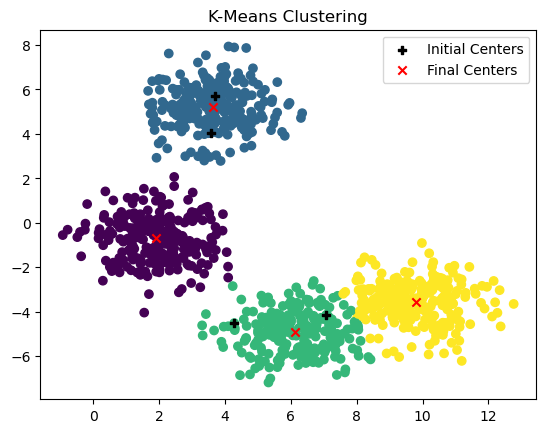

In [62]:
plt.scatter(X[:, 0], X[:, 1], c=assignments)
plt.scatter(initial_centers[:, 0], initial_centers[:, 1], c='black', marker='P', label='Initial Centers')
plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], c='red', marker='x', label='Final Centers')
plt.title('K-Means Clustering')
plt.legend()
plt.show()